# **Installation of Packages**

First install packages like numpy, scikit-learn, matplotlib

In [1]:
!pip3 install numpy 
!pip3 install SPARQLWrapper
!pip3 install scikit-learn
!pip3 install PIL
!pip3 install pandas
!pip3 install webcolors
!pip3 install matplotlib
!pip3 install graphviz 
!pip3 install pydotplus

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


# **Importation of packages**

We import the necessary packages

In [45]:
import os, sys, json
import urllib, shutil
import random, time, webcolors, numpy
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from urllib.error import HTTPError

from mpl_toolkits.mplot3d import Axes3D



# **Load Dataset**

In [3]:
endpoint_url = "https://query.wikidata.org/sparql"
img_data = {}

# Requête pour récupérer les infos de l'entité donnée - Q144/Chien par défaut
def query(wd='Q144', limit=5):
    return f"""SELECT ?item ?itemLabel ?pic
                WHERE {{
                  ?item wdt:P31 wd:{wd}.
                  ?item wdt:P18 ?pic.
                  SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
                }}
                LIMIT {limit}"""

def get_results(endpoint_url, query):
    user_agent = 'MaximeCornaton/0.0 (https://github.com/MaximeCornaton/CPE_Data_Mining; maxime.cornaton@cpe.fr)'
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    
    # Boucle de tentative en cas d'erreur 429 Too Many Requests
    for i in range(3):
        try:
            return sparql.query().convert()
        except HTTPError as e:
            if e.response.status_code == 429:
                retry_after = int(e.response.headers.get('Retry-After', '90'))
                print(f"Too Many Requests. Tentative dans {retry_after} secondes.")
                sleep(retry_after)
            else:
                raise e
    
    raise Exception("Nombre maximum de tentatives pour atteindre Wikidata atteint.")

# Pour créer le dossier des images s'il n'existe pas
def createFolder(name='images'):
    if name not in os.listdir():
        os.mkdir(name)
    else:
        print('Dossier '+name+' déjà existant !')

# Pour vérifier si un dossier est vide - évitons de retélécharger des images inutilement.
def isEmpty(name='images'):
    if len(os.listdir(name)) == 0:
        return True
    return False

# Pour ajouter des éléments à la bdd
def addImg(wd, limit):
    results = get_results(endpoint_url, query(wd, limit))
    for result in results['results']['bindings']:
        name_img = result['item']['value'].split("/")[-1] + "-" + wd # nom donné aux images téléchargées "numéro d'image - numéro de catégorie"
        
        #img_data[name_img] = {'image': result['pic']['value']}
        
        img_data[name_img] = {}
        downloadImage(result['pic']['value'], name_img)
        

# Ajoute les images de toutes les entités spécifiées
def addAllImg(wd, limit):
    for w in wd:
        addImg(w, limit)

# Pour télécharger l'image d'un élément de la bdd
def downloadImage(url, name_img='img0'):
    full_path = 'images/' + name_img + '.jpg'
    urllib.request.urlretrieve(url, full_path)
    time.sleep(1)

# Si les images sont déjà téléchargées on initialise le tableau
def initAlreadyDownload(namefolder='images'):
    for image in os.listdir(namefolder):
        #img_data[image.split(".")[0]] = {'image': ""}
        img_data[image.split(".")[0]] = {}

# Pour télécharger toutes les images - limit par query
def downloadAllImages(wd=['Q144'], limit=5):
    createFolder()
    if not isEmpty():
        print('Images déjà téléchargées !')
        initAlreadyDownload()
        return False
    addAllImg(wd, limit)
    return True 

#Supprimer une image du dossier 
def removeImage(image):
    if os.path.isfile('images/'+image):
        os.remove('images/'+image)
        img_data.pop(image.split(".")[0])
    else:
        shutil.rmtree('images/'+image)

bdd = ['Q144','Q14660','Q23442','Q28803','Q3305213', 'Q16521', 'Q146', 'Q5', 'Q4022'] #Chien, drapeau, ile, sandwich, peinture, taxon, chat, être humain, riviere
downloadAllImages(wd=bdd,limit=25)
print(img_data)


Dossier images déjà existant !
Images déjà téléchargées !
{'Q194215-Q23442': {}, 'Q53216650-Q146': {}, 'Q193253-Q23442': {}, 'Q613928-Q3305213': {}, 'Q4485643-Q14660': {}, 'Q5736147-Q28803': {}, 'Q192767-Q23442': {}, 'Q2060630-Q146': {}, 'Q201026-Q23442': {}, 'Q4485718-Q14660': {}, 'Q16069677-Q144': {}, 'Q4485711-Q14660': {}, 'Q94208532-Q28803': {}, 'Q192540-Q23442': {}, 'Q641561-Q144': {}, 'Q194364-Q23442': {}, 'Q19081-Q16521': {}, 'Q644856-Q3305213': {}, 'Q626352-Q3305213': {}, 'Q201272-Q23442': {}, 'Q634122-Q3305213': {}, 'Q110727478-Q146': {}, 'Q7650148-Q144': {}, 'Q200772-Q23442': {}, 'Q2919135-Q28803': {}, 'Q5503291-Q146': {}, 'Q112152493-Q146': {}, 'Q200939-Q23442': {}, 'Q4485652-Q14660': {}, 'Q12065066-Q144': {}, 'Q19123-Q16521': {}, 'Q19135-Q16521': {}, 'Q4421603-Q146': {}, 'Q642198-Q3305213': {}, 'Q1413628-Q146': {}, 'Q4485666-Q14660': {}, 'Q19088-Q16521': {}, 'Q636001-Q3305213': {}, 'Q18392844-Q144': {}, 'Q644106-Q3305213': {}, 'Q193896-Q23442': {}, 'Q7660509-Q144': {}, 'Q94

# **Adding Meta to the Dataset**

## *1. Exif* 

In [4]:
#Obtenir les metas d'une image
def getMetaImg(name, imgfile):
    #clés Exif
    DATE_KEY = 36867
    MODEL_KEY = 272
    
    img_data[name].update({
        #'size': [getSizeImg(imgfile.size), imgfile.size],
        'size': getSizeImg(imgfile.size),
        'orientation': getOrientationImg(imgfile.size),
        'format': imgfile.format,
    })
    
    getColorsImg(name, imgfile)
    
    exif_data = imgfile._getexif()
    if exif_data is not None:
        if DATE_KEY in exif_data:
            img_data[name]['date'] = exif_data[DATE_KEY]
        if MODEL_KEY in exif_data:
            img_data[name]['model'] = exif_data[MODEL_KEY]

def getOrientationImg(size): #(largeur,hauteur)
    width,height = size
    return "landscape" if width > height else "portrait" if height > width else "squared"
    
def getSizeImg(size): #(largeur,hauteur)
    width,height = size
    return "large" if width*height>1920*1080 else "small" if width*height<640*480 else "medium"
    


## *2. Main Color* 

In [5]:
def getColorsImg(name, imgfile, cluster_nbr=2, n_init=1):
    
    img_data[name]['colors'] = []
    
    # Redimensionner l'image pour accélérer le traitement
    imgfile = imgfile.resize((int(imgfile.size[0]/2), int(imgfile.size[1]/2)))

    # Convertir l'image en un tableau numpy
    img_array = numpy.array(imgfile)
    
    try:
        img_vector = img_array.reshape(-1, 3)

        clusters = MiniBatchKMeans(n_clusters=cluster_nbr, n_init=n_init, random_state=69).fit(img_vector) #Random state pour garder la meme seed ppour toutes les images

        for i, center in enumerate(clusters.cluster_centers_):
            rgb = tuple(map(int, center))
        

            img_data[name]['colors'].append(rgb)
            
    except Exception as e:
        print('Pas de couleur : {}'.format(e))
        #img_data[name]['colors'] = [-1]

        
def RGBtoName(rgb):
    # chercher le nom de couleur correspondant au code RGB
    try:
        color_name = webcolors.rgb_to_name(rgb)
    except ValueError:
        # si le nom exact n'est pas trouvé, trouver le nom le plus proche
        min_colors = {}
        for key, name_ in webcolors.CSS3_HEX_TO_NAMES.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(key)
            rd = (r_c - rgb[0]) ** 2
            gd = (g_c - rgb[1]) ** 2
            bd = (b_c - rgb[2]) ** 2
            min_colors[(rd + gd + bd)] = name_
        color_name = min_colors[min(min_colors.keys())]
    return color_name

## *3. All Meta* 

In [6]:
def openImgGetMeta(name): #name = 'img.jpg'
    try:
        with Image.open("images/"+name) as imgfile:
            #print(imgfile.size, imgfile.format)
            name = name.split(".")[0]
            getMetaImg(name, imgfile)

        imgfile.close()
        return True
    except FileNotFoundError as e:
        print('Impossible de trouver le fichier {}: {}'.format("images/"+name, e))
        return False
    except Exception as e:
        print('Erreur lors de l\'ouverture de l\'image {}: {}'.format("images/"+name, e))
        removeImage(name)
        return False
        
#Obtenir les metas de toutes nos images    
def openGetMetaAllImg(namefolder='images'):
    for image in os.listdir(namefolder):
        openImgGetMeta(image)

openGetMetaAllImg()

Pas de couleur : cannot reshape array of size 6305 into shape (3)
Pas de couleur : cannot reshape array of size 8855 into shape (3)
Pas de couleur : cannot reshape array of size 67760 into shape (3)
Pas de couleur : cannot reshape array of size 19780 into shape (3)
Pas de couleur : cannot reshape array of size 1753312 into shape (3)
Pas de couleur : cannot reshape array of size 6305 into shape (3)
Pas de couleur : cannot reshape array of size 6305 into shape (3)


## *4. Export to JSON* 

In [7]:
#Enregistre les metadonnées des images dans un JSON
def exportToJSON(data,name='img_data.json'):
    with open(name, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print("done")
        
#exportToJSON(data=img_data)

## *5. Open JSON* 

In [8]:

def openJSON(file="img_data.json"):
    # Ouvrir le fichier JSON en mode lecture (fermé automatiquement)
    with open(file, 'r') as f:
        data = json.load(f)
    return data
    

## *6. Add categories* 

In [9]:
# Requête API à Wikidata pour récupérer les catégories de l'image
def wikidataAPI(_id,lang):
    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={_id}&props=labels|claims&languages={lang}&format=json"
    #if lang != "":
    #    #categorie
    #    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={_id}&props=labels&languages={lang}&format=json"
    #else:
    #    #image
    #    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={_id}&props=claims&format=json"
    response = requests.get(url)
    return json.loads(response.text)


def findTagsImg(_id, lang='en'): #"Q7704028-Q144"
    
    image_id, cat_id = _id.split("-")
    
    # Requête API à Wikidata pour récupérer les catégories de l'image
    
    #img_data = wikidataAPI(image_id,lang)
    cat_data = wikidataAPI(cat_id,lang)
    
    # Extraire le libellé de la catégorie dans la langue souhaitée
    main_tag = cat_data.get('entities', {}).get(cat_id, {}).get('labels', {}).get(lang, {}).get('value', '')
    
    # Trouver les catégories dans la réponse de la requête API sur l'image
    #claims = img_data.get("entities", {}).get(image_id, {}).get("claims", {})
    #print([x['mainsnak']['datavalue']['value'] for prop in ["P910", "P373"] for x in claims.get(prop, [])])
    #categories = formatCategory([x['mainsnak']['datavalue']['value'] for prop in ["P910", "P373"] for x in claims.get(prop, [])])
            
    #if main_tag not in categories:
        #categories.append(main_tag)
        
    categories = [main_tag]
    
    return categories


def formatCategory(categories):
    categories_ = []
    
    removeCar = ['(', ')']
    splitCar = [',', ' ']
    
    for category in categories:
        if isinstance(category, str):
            for car in removeCar:
                category = category.replace(car, '')
            for car in splitCar:
                parts = category.split(car)
                if len(parts) > 1:
                    categories_.extend(parts[1:])
                    category = parts[0]
            categories_.append(category.lower())
    
    return categories_


def addTagsJSON(image_id = "Q7704028", categories=[]):
    data = openJSON(file="img_data.json")
    data[image_id]['tags'] = categories


def addAllTagsJSON():
    for _id in data:
        data[_id]['tags'] = findTagsImg(_id)
    return data

#data = openJSON(file="img_data.json")
data = img_data
data = addAllTagsJSON()
exportToJSON(data)


done


# **Data Analyses**

## *1. Class User* 

In [10]:
class User:
    def __init__(self, favorite_pictures=None):
        self._favorite_colors = []
        self._favorite_orientations = []
        self._favorite_sizes = []
        self._favorite_tags = []
        self._favorite_pictures = favorite_pictures
        
        self.init_user()

    def get_favorite_pictures(self):
        return self._favorite_pictures

    def __str__(self):
        return f"User with favorite color {self._favorite_colors}, orientation {self._favorite_orientations}, size {self._favorite_sizes}, tags {self._favorite_tags} and favorite pictures {self._favorite_pictures}"
    
    
    def init_user(self):
        for img in self._favorite_pictures:
            img = img.split(".")[0]
            self._favorite_colors += [data[img]["colors"]]
            #self._favorite_colors.append([c/255 for c in data[img]["colors"][0]] if len(data[img]["colors"])>0 else -1)
            self._favorite_orientations.append(data[img]["orientation"])
            self._favorite_tags += [data[img]["tags"]]
            #self._favorite_tags.append(data[img]["tags"][0])
            self._favorite_sizes.append(data[img]["size"])
            
    def get_favorite_tags(self):
        return self._favorite_tags
    
    def get_favorite_orientations(self):
        return self._favorite_orientations
    
    def get_favorite_colors(self):
        return self._favorite_colors
    
    def get_favorite_sizes(self):
        return self._favorite_sizes


## *2. Creation of random Users* 

In [11]:
number_users = 10
users = []

for i in range(number_users):
    
    number_pictures_liked = random.randint(10, 20)
    
    user = User(favorite_pictures=random.sample(os.listdir("images"), k=number_pictures_liked))
    users.append(user)



## *3. Analyse Users* 

### *Nos données* 

In [12]:
user = users[0]

colors = user.get_favorite_colors()
#print(colors)

#print(tags)

#DataFrame Utilisateur
#dataUser = pd.DataFrame({'taille': user.get_favorite_sizes(), 'orientation': user.get_favorite_orientations(), 'couleur':user.get_favorite_colors(), 'tags':user.get_favorite_tags()})
#'couleur': user.get_favorite_colors(), 'tags': user.get_favorite_tags()

print(user._favorite_pictures)


#dataUser

['Q893453-Q146.jpg', 'Q194451-Q23442.jpg', 'Q613928-Q3305213.jpg', 'Q4485729-Q14660.jpg', 'Q19088-Q16521.jpg', 'Q110727478-Q146.jpg', 'Q19070-Q16521.jpg', 'Q200226-Q23442.jpg', 'Q2060630-Q146.jpg', 'Q196701-Q23442.jpg', 'Q19137-Q16521.jpg']


In [13]:
dataFrame = pd.read_json('img_data.json').T
dataFrame

,size,orientation,format,colors,tags,date,model
Q194215-Q23442,medium,landscape,JPEG,"[[39, 41, 30], [202, 207, 160]]",[island],NaN,NaN
Q53216650-Q146,large,portrait,JPEG,"[[216, 215, 219], [67, 61, 64]]",[house cat],2012:01:05 11:35:19,DMC-FZ20
Q193253-Q23442,large,landscape,JPEG,"[[95, 86, 78], [30, 37, 89]]",[island],NaN,NaN
Q613928-Q3305213,large,portrait,JPEG,"[[65, 55, 48], [137, 135, 119]]",[painting],NaN,NaN
Q4485643-Q14660,small,landscape,PNG,"[[125, 126, 124], [93, 34, 97]]",[flag],NaN,NaN
...,...,...,...,...,...,...,...
Q611583-Q3305213,large,landscape,JPEG,"[[59, 40, 24], [151, 119, 84]]",[painting],2008:04:24 08:46:09,Hasselblad CF528-39
Q7704028-Q144,medium,landscape,JPEG,"[[173, 173, 173], [36, 36, 36]]",[dog],NaN,NaN
Q384348-Q144,large,landscape,JPEG,"[[177, 166, 151], [82, 75, 62]]",[dog],2005:07:03 19:53:46,DMC-FZ20
Q1320354-Q144,medium,portrait,JPEG,"[[25, 20, 23], [215, 222, 209]]",[dog],NaN,NaN


### *1. Preparation des données* 

#### *1) Methode 1* 

chaque couleur est divisée selon r,g,b et chaque tags forme uen colonne avec une réponse binaire.

#### *2) Label Encoder* 

Ici, plus simplement on définit des valeurs numérique pour chaque paramêtre global.

In [14]:
dataFrame['colors'] = dataFrame['colors'].apply(lambda x: [[0,0,0], [0,0,0]] if len(x) == 0 else x)

dataFrame = dataFrame.drop(columns=['date','model'])

#generating numerical labels

le1 = LabelEncoder()
dataFrame['size'] = le1.fit_transform(dataFrame['size'])

le2 = LabelEncoder()
dataFrame['orientation'] = le2.fit_transform(dataFrame['orientation'])

le3 = LabelEncoder()
dataFrame['format'] = le3.fit_transform(dataFrame['format'])

le4 = LabelEncoder()
dataFrame['couleur_1'] = le4.fit_transform([mcl.to_hex([couleur[0][0]/255,couleur[0][1]/255,couleur[0][2]/255]) if len(couleur[0]) > 0 else 0 for couleur in dataFrame["colors"]])

le5 = LabelEncoder()
dataFrame['couleur_2'] = le5.fit_transform([mcl.to_hex([couleur[1][0]/255,couleur[1][1]/255,couleur[1][2]/255]) if len(couleur[0]) > 0 else 0 for couleur in dataFrame["colors"]])

le6 = LabelEncoder()
dataFrame['tag'] = le6.fit_transform([tag[0] for tag in dataFrame['tags']])

dataFrame = dataFrame.drop(columns=['tags', 'colors'])

dataFrame

,size,orientation,format,couleur_1,couleur_2,tag
Q194215-Q23442,1,0,0,19,120,3
Q53216650-Q146,0,1,0,134,31,2
Q193253-Q23442,0,0,0,65,11,3
Q613928-Q3305213,0,1,0,34,69,4
Q4485643-Q14660,2,0,2,82,44,1
...,...,...,...,...,...,...
Q611583-Q3305213,0,0,0,30,74,4
Q7704028-Q144,1,0,0,105,14,0
Q384348-Q144,0,0,0,110,38,0
Q1320354-Q144,1,1,0,7,131,0


In [15]:
#Ajout des likes:
#dataFrame['liked'] = numpy.array('NL')

#for img in user._favorite_pictures:
#    dataFrame.at[img.split('.')[0], 'liked'] = 'liked'


resultframe = pd.DataFrame(numpy.full(len(dataFrame),"not liked"), columns=['liked'], index= dataFrame['size'].index)
for img in user._favorite_pictures:
    resultframe.at[img.split('.')[0], 'liked'] = 'liked'

le7 = LabelEncoder()

#print(resultframe)
resultframe['liked'] = le7.fit_transform(resultframe['liked'])





resultframe

,liked
Q194215-Q23442,1
Q53216650-Q146,1
Q193253-Q23442,1
Q613928-Q3305213,0
Q4485643-Q14660,1
...,...
Q611583-Q3305213,1
Q7704028-Q144,1
Q384348-Q144,1
Q1320354-Q144,1


### *2. Apprentissage et Test* 

In [16]:
columns_names = dataFrame.columns.tolist()

X = dataFrame
y = resultframe #liked

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

#print(X_train)


# MiniBatchKMeans clustering
clusters = MiniBatchKMeans(n_clusters=2, n_init=1, random_state=69).fit(X_train)




In [17]:
from sklearn import tree
#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X, y) #dataFrame, ResultFrame


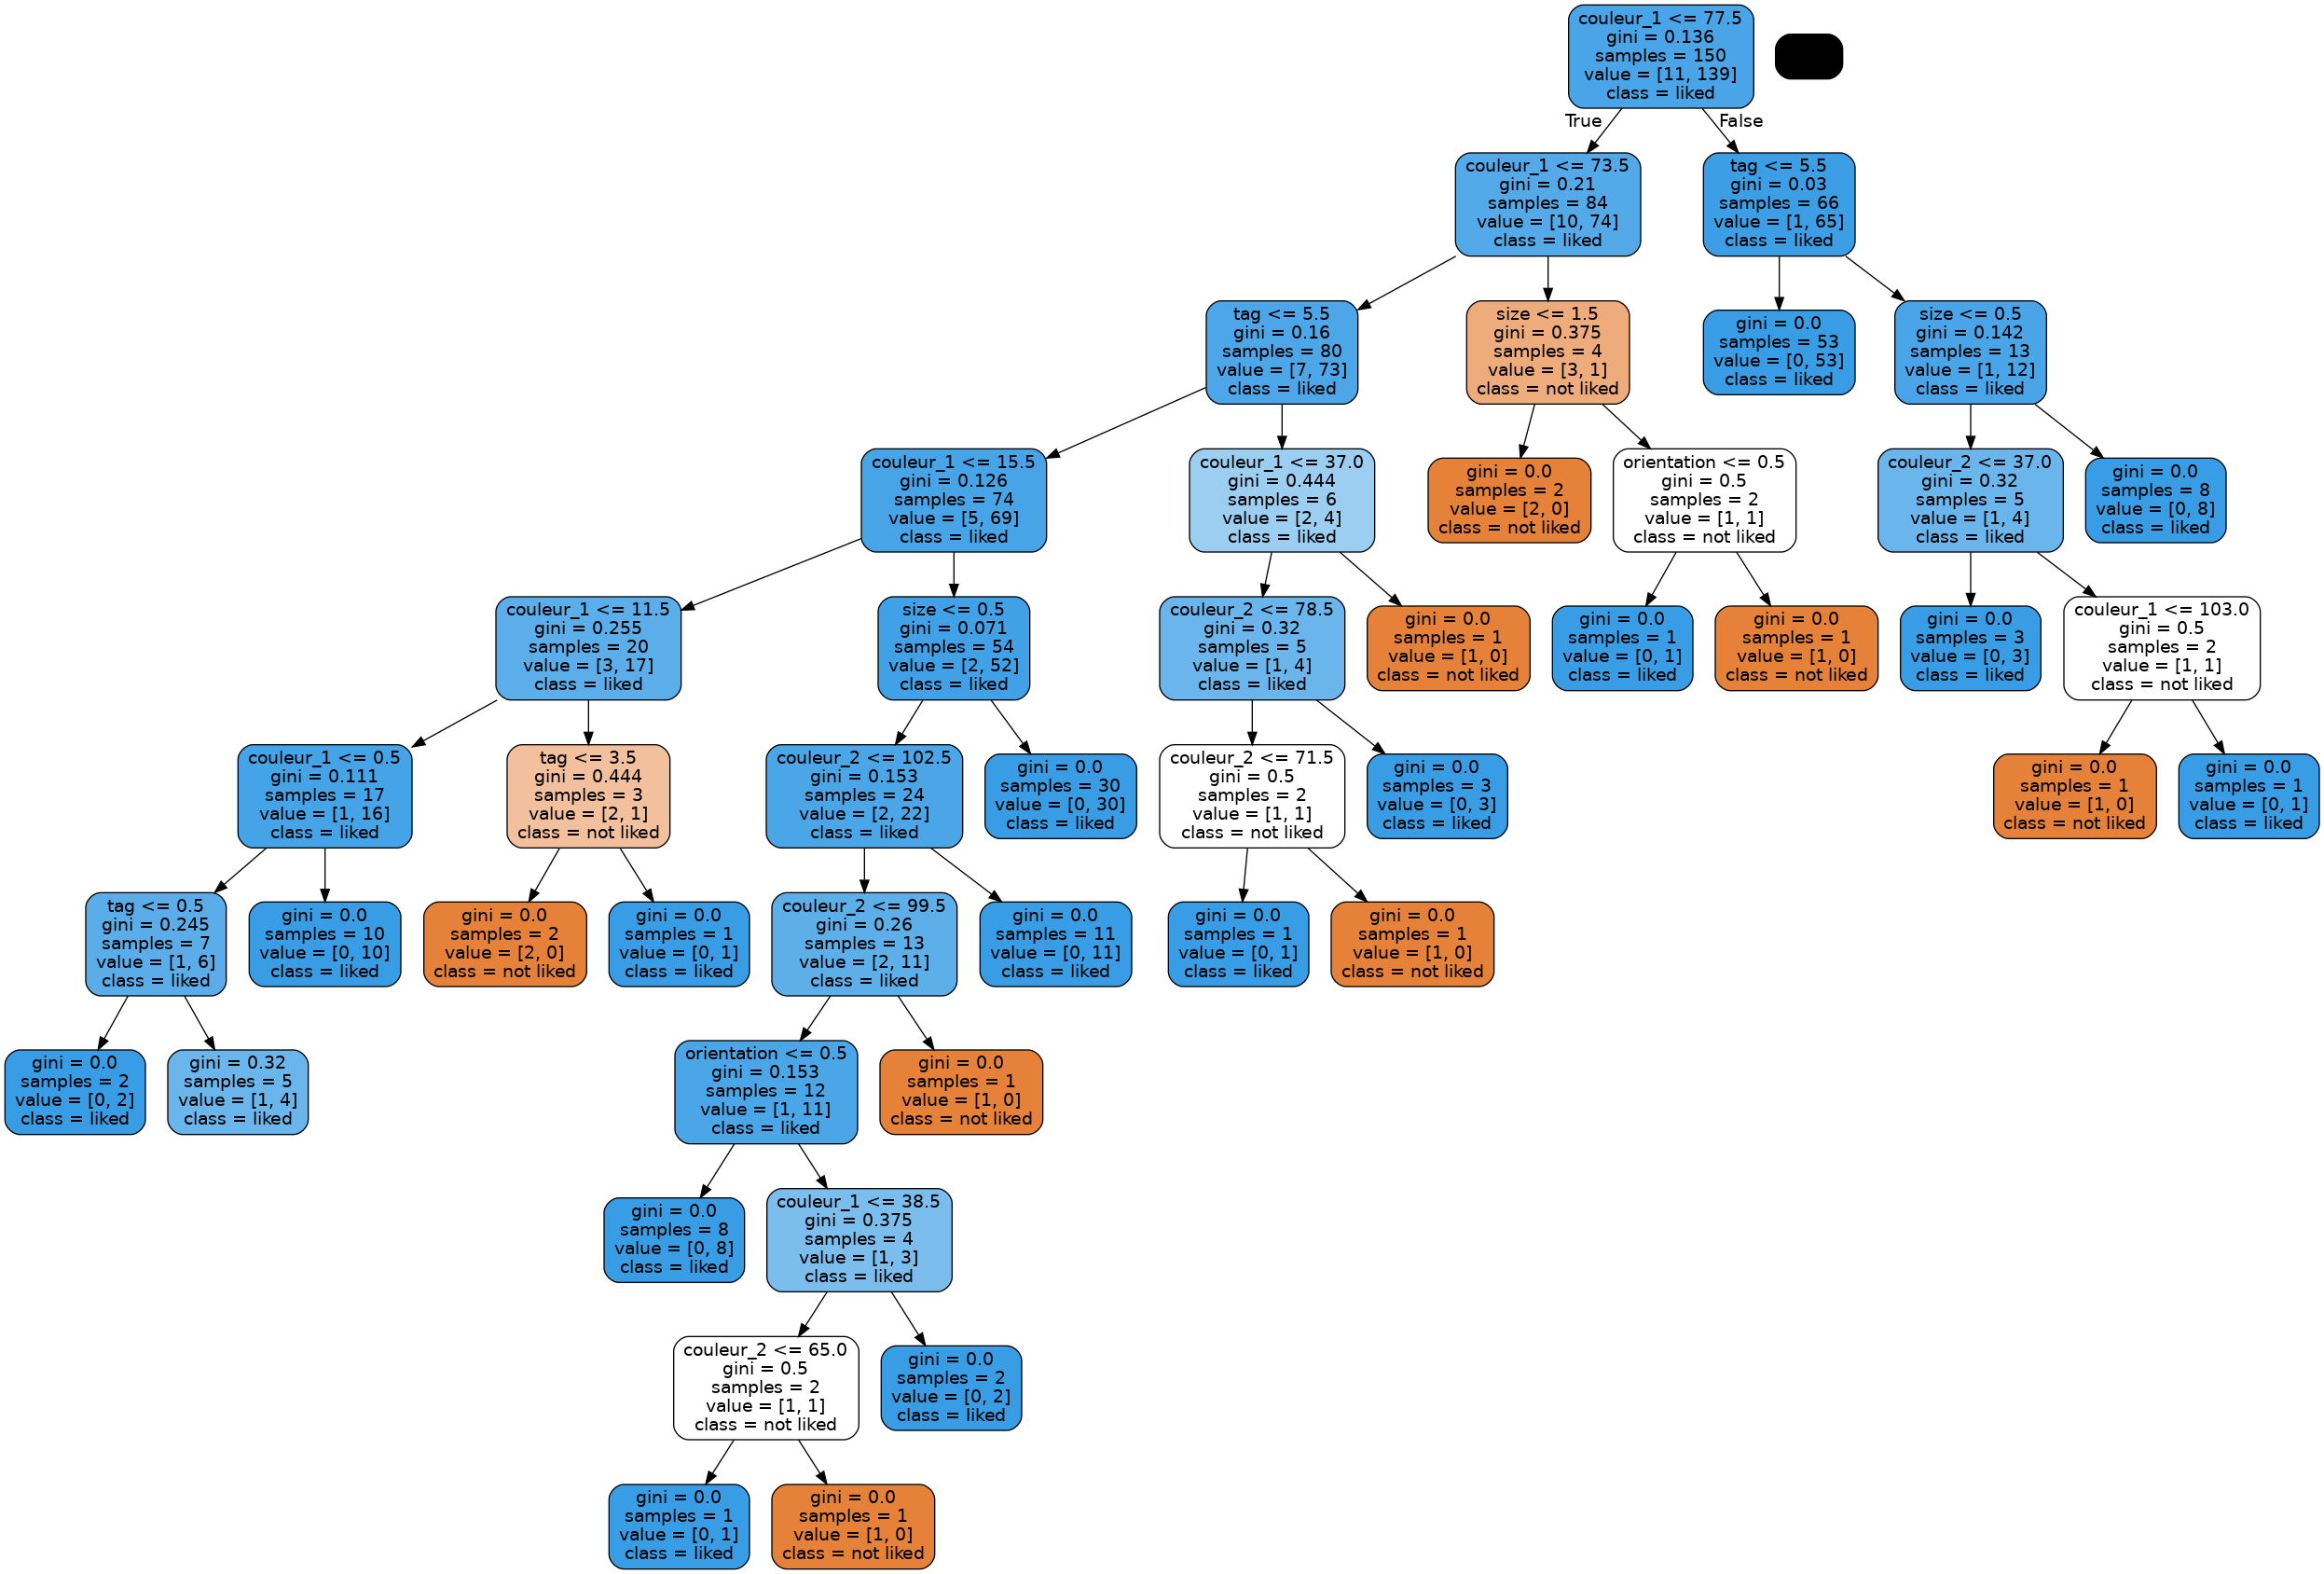

In [18]:
from IPython.display import Image, display

dot_data = tree.export_graphviz(
    dtc, 
    out_file=None,
    filled=True, 
    rounded=True,
    class_names = le7.inverse_transform(
            resultframe.liked.unique()),
    feature_names=X.columns
    ) 



graph = graphviz.Source(dot_data) 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)



In [19]:
# Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=69)
rfc = rfc.fit(dataFrame, resultframe.values.ravel())

# prediction
prediction = rfc.predict(
    [
        [
            le1.transform([1])[0],
            le2.transform([0])[0],
            le3.transform([0])[0],
            le4.transform([19])[0],
            le5.transform([120])[0],
            le6.transform([1])[0],
        ]
    ]
)
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

ValueError: y contains previously unseen labels: 1

# **Data Visualization**

## *1. Number of pictures by year* 

{'': 102, '2012:': 3, '2007:': 6, '2014:': 7, '0000:': 1, '2018:': 1, '2022:': 1, '2009:': 3, '2005:': 2, '2010:': 6, '2004:': 2, '2015:': 2, '2006:': 3, '2017:': 1, '2011:': 1, '1942:': 1, '2008:': 4, '2019:': 2, '2021:': 1, '2016:': 1}


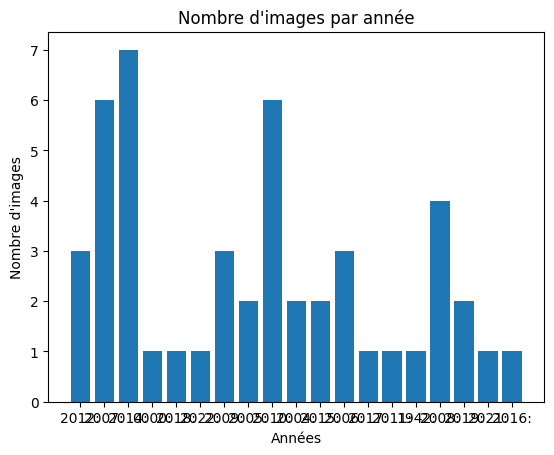

In [20]:
nb_images_year = {}

for image in data:
    date = data[image].get('date', '')[0:5] #Recupere la date de l'image
    nb_images_year[date] = nb_images_year.get(date,0) +1
    
print(nb_images_year)

#Si on veut retirer les images sans date:
nb_images_year.pop('')

noms = list(nb_images_year.keys())
valeurs = list(nb_images_year.values())

plt.bar(noms, valeurs)
plt.title("Nombre d'images par année")
plt.xlabel("Années")
plt.ylabel("Nombre d'images")
plt.show()

## *2. Number of images for different types: image size, image orientation, camera models, etc.* 

{'medium': 44, 'large': 61, 'small': 45}
{'landscape': 104, 'portrait': 45, 'squared': 1}
{'': 106, 'DMC-FZ20': 2, 'Canon PowerShot SD20': 1, 'NIKON D610': 1, 'Canon EOS 5D': 1, 'E5700': 1, 'Hasselblad H3D-39': 1, 'Canon PowerShot G12': 1, 'iPhone 4S': 1, 'GT-I9100P': 1, 'NIKON D5000': 1, 'Canon EOS 40D': 1, 'NIKON D50': 1, 'NIKON D40X': 1, 'Canon EOS REBEL T1i': 1, 'DSC-H50': 1, 'Canon DIGITAL IXUS 100 IS': 1, 'iPhone 5': 1, 'C765UZ': 1, 'Canon PowerShot S50': 1, 'XZ-1            ': 1, 'iPhone 6': 1, 'FinePix S9500  ': 1, 'NIKON D3S': 1, 'NIKON D90': 1, 'Canon EOS REBEL T2i': 1, 'NIKON D7000': 1, 'E5200': 1, 'DMC-FZ200': 1, 'NIKON D70': 1, 'Canon EOS 5D Mark II': 1, 'PENTAX Optio330RS': 1, 'NIKON D80': 1, 'iPhone XS': 1, 'FinePix F50fd  ': 1, 'iPhone 8 Plus': 1, 'DSC-V1': 1, 'Canon EOS 650D': 1, 'Canon DIGITAL IXUS v3': 1, 'DSC-P150': 1, 'Canon PowerShot G9': 1, 'Canon IXY DIGITAL 30': 1, 'DVC\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00        ': 1, 'Hasselblad CF528-39': 1}


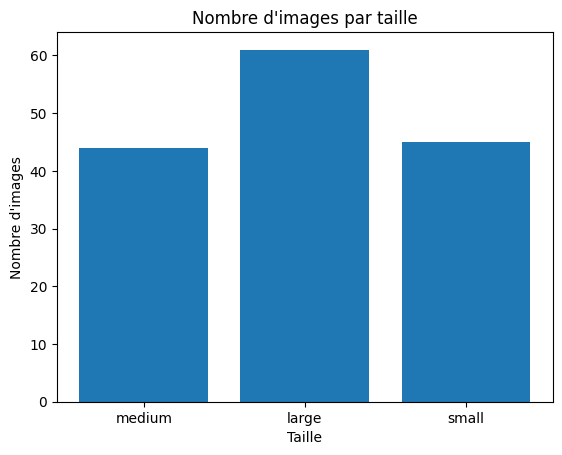

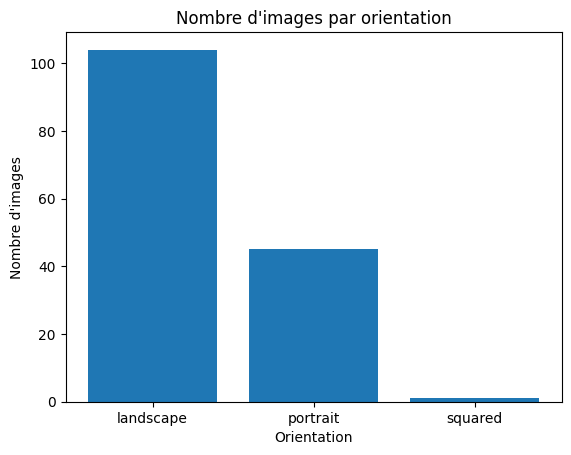

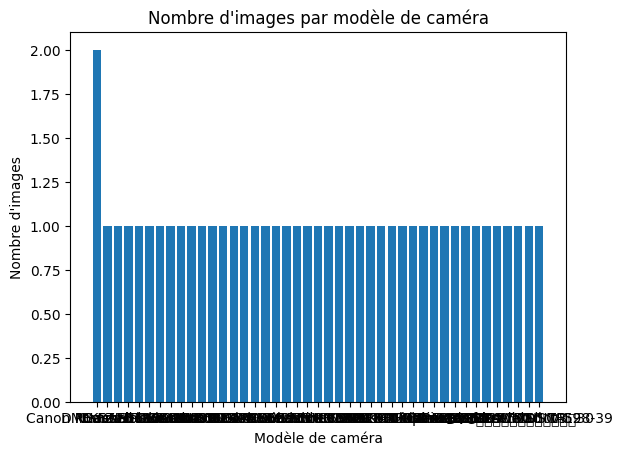

In [25]:
nb_images_size = {}
nb_images_orientation = {}
nb_images_camera = {}


for image in data :
   size = data[image].get('size','')
   nb_images_size[size] = nb_images_size.get(size,0) +1
  
   orientation = data[image].get('orientation','')
   nb_images_orientation[orientation] = nb_images_orientation.get(orientation,0) +1
  
   camera = data[image].get('model','')
   nb_images_camera[camera] = nb_images_camera.get(camera,0) +1
  
print(nb_images_size)
print(nb_images_orientation)
print(nb_images_camera)

nb_images_camera.pop('')

entity1 = list(nb_images_size.keys())
val1 = list(nb_images_size.values())
plt.bar(entity1, val1)
plt.title("Nombre d'images par taille")
plt.xlabel("Taille")
plt.ylabel("Nombre d'images")
plt.show()


entity2 = list(nb_images_orientation.keys())
val2 = list(nb_images_orientation.values())
plt.bar(entity2, val2)
plt.title("Nombre d'images par orientation")
plt.xlabel("Orientation")
plt.ylabel("Nombre d'images")
plt.show()


entity3 = list(nb_images_camera.keys())
val3 = list(nb_images_camera.values())
plt.bar(entity3, val3)
plt.title("Nombre d'images par modèle de caméra")
plt.xlabel("Modèle de caméra")
plt.ylabel("Nombre d'images")
plt.show()

## *2. Number of images - brands* 

{'DMC-FZ20': ['DMC-FZ20'], 'Canon': ['Canon PowerShot SD20', 'Canon EOS 5D', 'Canon PowerShot G12', 'Canon EOS 40D', 'Canon EOS REBEL T1i', 'Canon DIGITAL IXUS 100 IS', 'Canon PowerShot S50', 'Canon EOS REBEL T2i', 'Canon EOS 5D Mark II', 'Canon EOS 650D', 'Canon DIGITAL IXUS v3', 'Canon PowerShot G9', 'Canon IXY DIGITAL 30'], 'NIKON': ['NIKON D610', 'NIKON D5000', 'NIKON D50', 'NIKON D40X', 'NIKON D3S', 'NIKON D90', 'NIKON D7000', 'NIKON D70', 'NIKON D80'], 'E5700': ['E5700'], 'Hasselblad': ['Hasselblad H3D-39', 'Hasselblad CF528-39'], 'iPhone': ['iPhone 4S', 'iPhone 5', 'iPhone 6', 'iPhone XS', 'iPhone 8 Plus'], 'GT-I9100P': ['GT-I9100P'], 'DSC-H50': ['DSC-H50'], 'C765UZ': ['C765UZ'], 'XZ-1': ['XZ-1            '], 'FinePix': ['FinePix S9500  ', 'FinePix F50fd  '], 'E5200': ['E5200'], 'DMC-FZ200': ['DMC-FZ200'], 'PENTAX': ['PENTAX Optio330RS'], 'DSC-V1': ['DSC-V1'], 'DSC-P150': ['DSC-P150'], 'DVC\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00': ['DVC\x00\x00\x00\x00\x00\x00\x00\x00\x

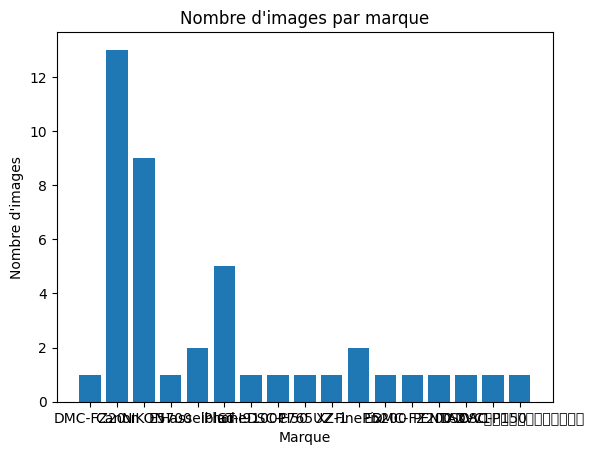

In [31]:
marques = {}

for modele in nb_images_camera:
    marque = modele.split(' ')[0] # Sépare la marque du modèle en utilisant le premier mot
    if marque in marques:
        marques[marque].append(modele)
    else:
        marques[marque] = [modele]

print(marques)

entity4 = list(marques.keys())
print([len(el) for el in marques.values()])
val4 = [len(el) for el in marques.values()]
plt.bar(entity4, val4)
plt.title("Nombre d'images par marque")
plt.xlabel("Marque")
plt.ylabel("Nombre d'images")
plt.show()


## *3. Color characteristics* 

### **En 2D** 

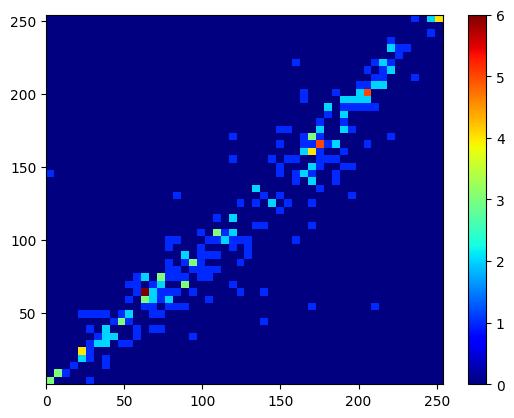

In [39]:
# Initialiser un tableau vide pour stocker toutes les couleurs
all_colors = []

# Parcourir toutes les images et ajouter leurs couleurs à la liste de toutes les couleurs
for image in data:
    colors = data[image]['colors']
    all_colors += colors

# Convertir la liste de couleurs en un tableau NumPy
all_colors = numpy.array(all_colors)

#print(all_colors)

# Créer l'histogramme en utilisant Matplotlib
plt.hist2d(all_colors[:, 0], all_colors[:, 1], bins=50, cmap=plt.cm.jet)
plt.colorbar()

# Afficher l'histogramme
plt.show()

## **En 3D**

Avec toute les couleurs :

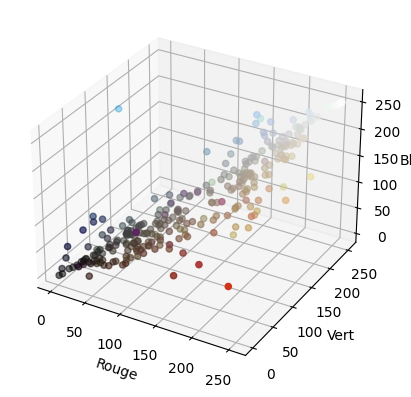

In [53]:

# Initialiser les listes de coordonnées x, y et z
x = []
y = []
z = []

colors = []

# Parcourir toutes les images dans le fichier JSON
for image in data:
    # Parcourir toutes les couleurs pour chaque image
    for color in data[image]['colors']:
        # Ajouter les valeurs RGB aux listes x, y et z
        r, g, b = color
        x.append(r)
        y.append(g)
        z.append(b)
        colors.append(mcl.to_hex([r/255,g/255,b/255]))
# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ajouter les points au graphique en 3D
ax.scatter(x, y, z, c=colors, marker='o')

# Ajouter des labels aux axes
ax.set_xlabel('Rouge')
ax.set_ylabel('Vert')
ax.set_zlabel('Bleu')

# Afficher le graphique
plt.show()

Avec seulement les 1eres de chaque image:

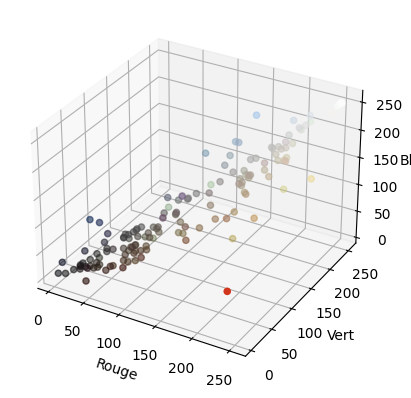

In [64]:

# Initialiser les listes de coordonnées x, y et z
x = []
y = []
z = []

colors = []

# Parcourir toutes les images dans le fichier JSON
for image in data:
    # Ajouter les valeurs RGB aux listes x, y et z
    if data[image]['colors'] != []:

        r, g, b = data[image]['colors'][0]
        x.append(r)
        y.append(g)
        z.append(b)
        colors.append(mcl.to_hex([r/255,g/255,b/255]))
# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ajouter les points au graphique en 3D
ax.scatter(x, y, z, c=colors, marker='o')

# Ajouter des labels aux axes
ax.set_xlabel('Rouge')
ax.set_ylabel('Vert')
ax.set_zlabel('Bleu')

# Afficher le graphique
plt.show()

# **Recommendation System**
